In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import seaborn as sns
import os

import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300


In [ ]:
dsets = pd.read_csv('/Users/tessa/Documents/GitHub/scPerturb/metadata/scperturb_dataset_info.csv')#, index_col=0)

In [ ]:
#(dsets.index+dsets['dataset_index'])[~(dsets.index + dsets['dataset_index']).isna()]
dsets.iloc[:,1] = dsets.iloc[:,1].fillna('')
# want to change index to those when second col exists

In [ ]:
dsets.index = (dsets.iloc[:,0]+'_'+dsets.iloc[:,1]).str.rstrip('_')

In [ ]:
dsets.drop(index="FrangiehIzar2021_RNA", inplace = True)
dsets.drop(index = "PapalexiSatija2021_eccite_arrayed_RNA", inplace=True)
dsets.drop(index = "PapalexiSatija2021_eccite_RNA", inplace=True)

In [ ]:
# correct paired datasets

dsets.loc[["FrangiehIzar2021_protein","PapalexiSatija2021_eccite_arrayed_protein",
          "PapalexiSatija2021_eccite_protein"],"Modality = Data type"] = "RNA + protein"

In [2]:
dsets

NameError: name 'dsets' is not defined

In [33]:
vals.index.values

array(['CRISPRi', 'CRISPR-cas9', 'drugs', 'CRISPR-cas9, TCR stim',
       'cytokines', 'CRISPRa', 'drugs, CRISPR-cas9', 'CRISPi'],
      dtype=object)

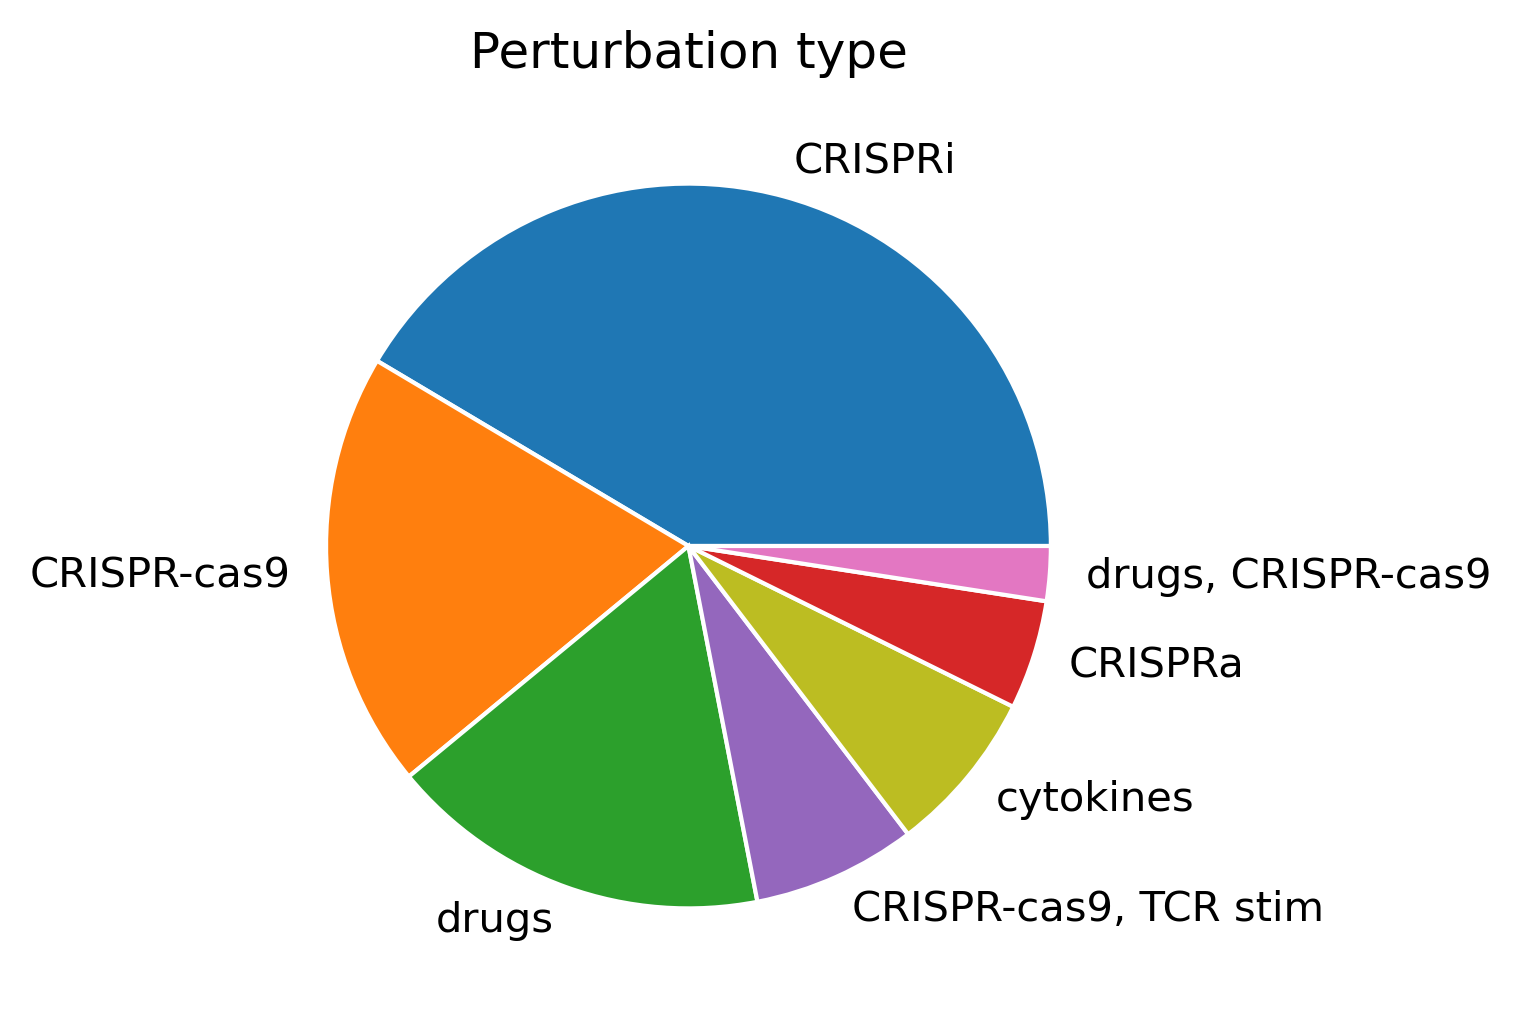

In [34]:
fig, ax = plt.subplots()

size = 0.3
vals = dsets['Perturbation'].value_counts()

colors_perturbation_types = {
    'CRISPRi': 'tab:blue', 
    'CRISPRa': 'tab:red', 
    'CRISPR-cas9': 'tab:orange', 
    'drugs': 'tab:green',
    'cytokines': 'tab:olive',
    'CRISPR-cas9, TCR stim': 'tab:purple',
    'drugs, CRISPR-cas9': 'tab:pink'
}


#colors = colors_perturbation_types[vals.index.values]
#cmap = plt.colormaps["tab20c"]
#outer_colors = cmap(np.arange(3)*4)
#inner_colors = cmap([1, 2, 5, 6, 9, 10])

#ax.pie(dsets['Perturbation'].value_counts(), radius=1, colors=outer_colors,
#       wedgeprops=dict(width=0.3, edgecolor='w'))
ax.pie(vals, radius=1,
       wedgeprops=dict(width=1, edgecolor='w'), labels = vals.index.values,
       colors=[colors_perturbation_types[key] for key in vals.index.values],)

#ax.pie(vals.flatten(), radius=1-size, colors=inner_colors,
#       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Perturbation type')
plt.savefig("./figs/perturbation_type.pdf")
plt.show()


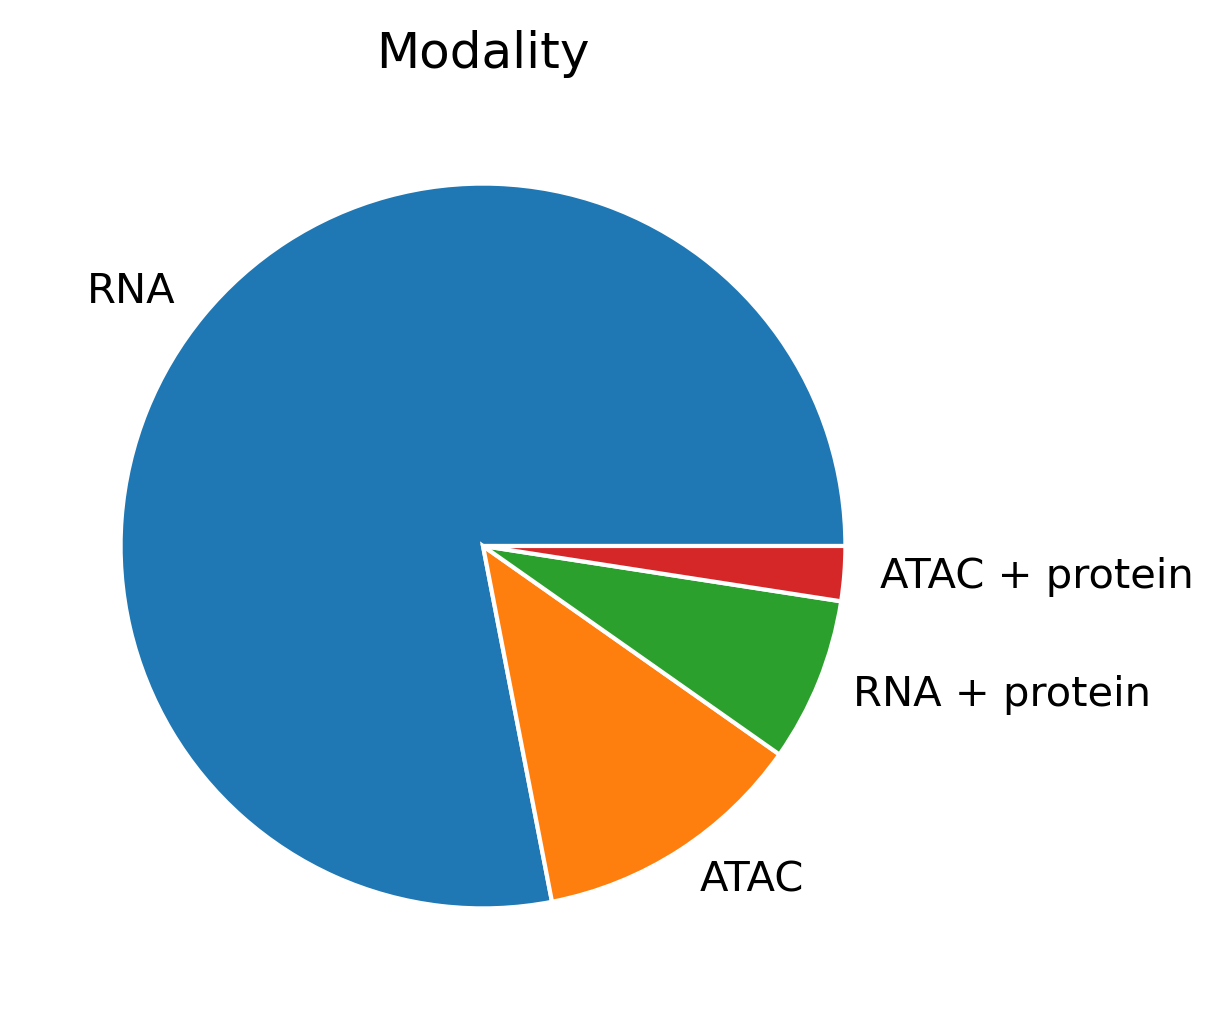

In [35]:
fig, ax = plt.subplots()

size = 0.3
vals = dsets['Modality = Data type'].value_counts()

#cmap = plt.colormaps["tab20c"]
#outer_colors = cmap(np.arange(3)*4)
#inner_colors = cmap([1, 2, 5, 6, 9, 10])

#ax.pie(dsets['Perturbation'].value_counts(), radius=1, colors=outer_colors,
#       wedgeprops=dict(width=0.3, edgecolor='w'))
ax.pie(vals, radius=1,# colors=outer_colors,
       wedgeprops=dict( edgecolor='w'), labels = vals.index.values)

#ax.pie(vals.flatten(), radius=1-size, colors=inner_colors,
#       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Modality')
plt.savefig("./figs/modality_pie.pdf")
plt.show()

In [36]:
dsets['tissue type'].value_counts()

cell_line    28
primary       8
stem          4
Name: tissue type, dtype: int64

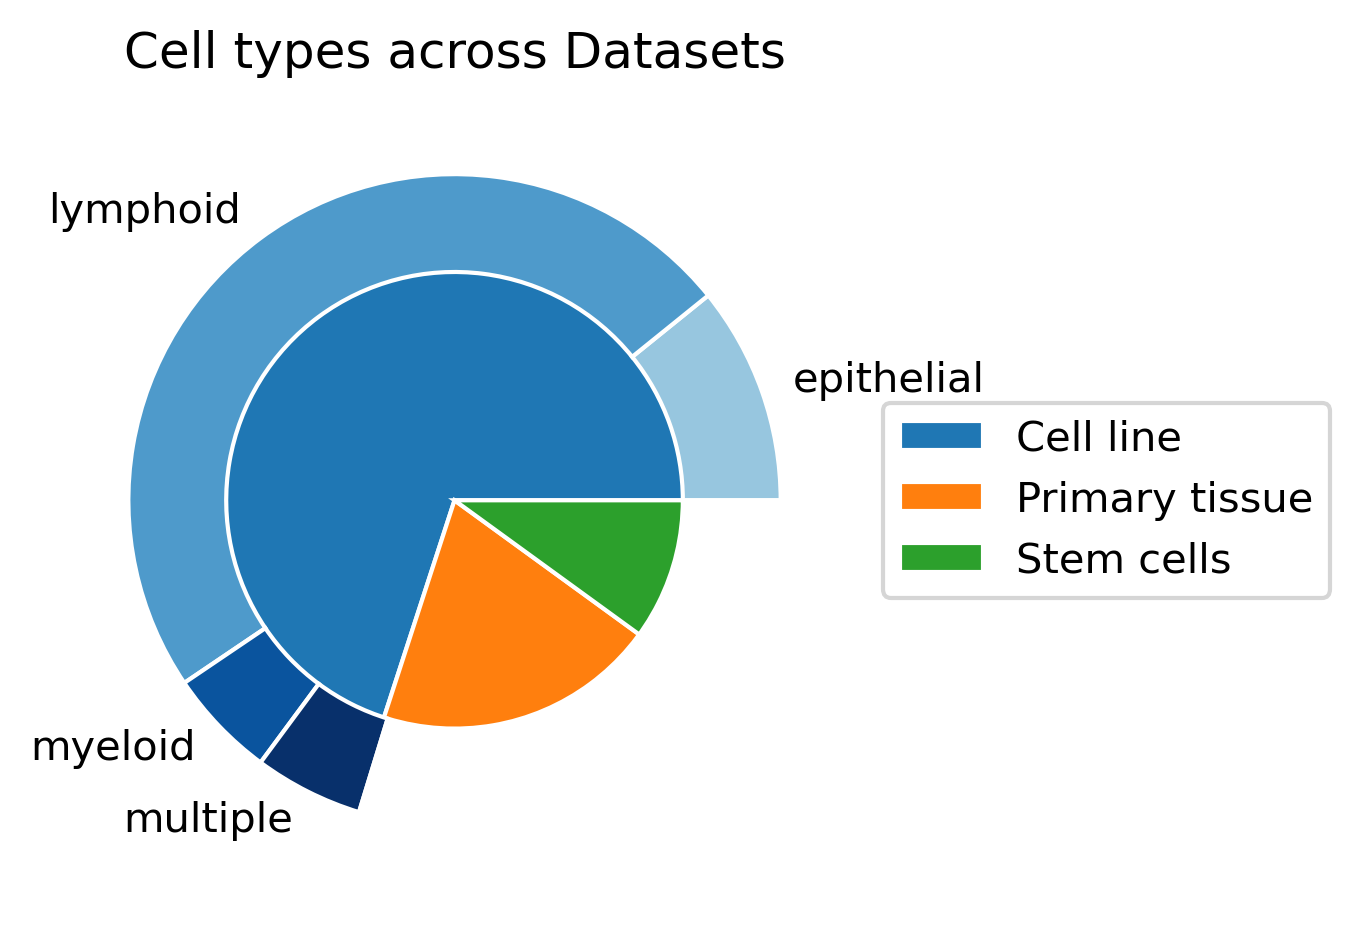

In [66]:
fig, ax = plt.subplots()

size = 0.3
vals = dsets['tissue type'].value_counts()

vals3 = {'epithelial' : dsets[dsets['tissue type']=='cell_line']['celltype'].str.contains('epithel').sum(),
'lymphoid' :dsets[dsets['tissue type']=='cell_line']['celltype'].str.contains('lympho').sum() +dsets[dsets['tissue type']=='cell_line']['celltype'].str.contains('T cells').sum(),
'myeloid':2,
 'multiple':2, '':11}
vals3 = pd.Series(vals3)
#vals2 = (vals2)/(sum(vals2)+5)
cmap = plt.colormaps["Blues"]

outer_colors = cmap([100,150,220,350,1])
outer_colors[4,:] = [1,1,1,1]
#inner_colors = cmap([1, 2, 5, 6, 9, 10])

#ax.pie(dsets['Perturbation'].value_counts(), radius=1, colors=outer_colors,
#       wedgeprops=dict(width=0.3, edgecolor='w'))
ax.pie(vals, radius=1,# colors=outer_colors,
       wedgeprops=dict(width=1, edgecolor='w'))#, labels = vals.index.values)

ax.pie(vals3, radius=1,labels = vals3.index.values, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])

ax.set(aspect="equal", title='Cell types across Datasets')
#plt.legend(labels= vals.index.values, loc="right")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),labels= ["Cell line", "Primary tissue",
                                                             "Stem cells"]) #vals.index.values)

plt.savefig("./figs/nested_grouped.pdf",bbox_inches='tight')
plt.show()